In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
dataFile = '/kaggle/input/clevelend-dataset/Heart_disease_cleveland_new.csv'
df = pd.read_csv(dataFile)

In [4]:
X=df.iloc[:,0:13]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1


In [5]:
y=df['target']
y.value_counts()

target
0    164
1    139
Name: count, dtype: int64

In [6]:
df.skew(axis = 0)

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.208791
thal        0.342673
target      0.166406
dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression(solver='lbfgs', max_iter=10000)
logModel.fit(X_train, y_train)
y_pred = logModel.predict(X_test)

Confusion Matrix:


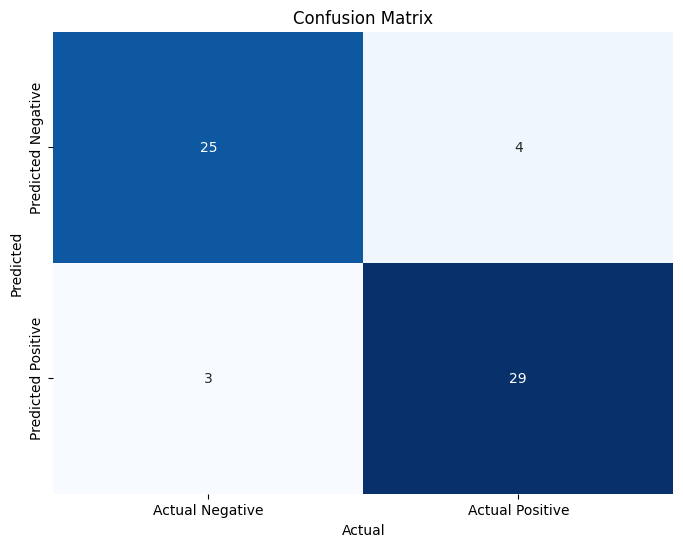

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# SVM Classifier

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# from sklearn.metrics import confusion_matrix
# cm_test = confusion_matrix(y_pred, y_test)

# y_pred_train = classifier.predict(X_train)
# cm_train = confusion_matrix(y_pred_train, y_train)

# print()
# print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
# print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Confusion Matrix:


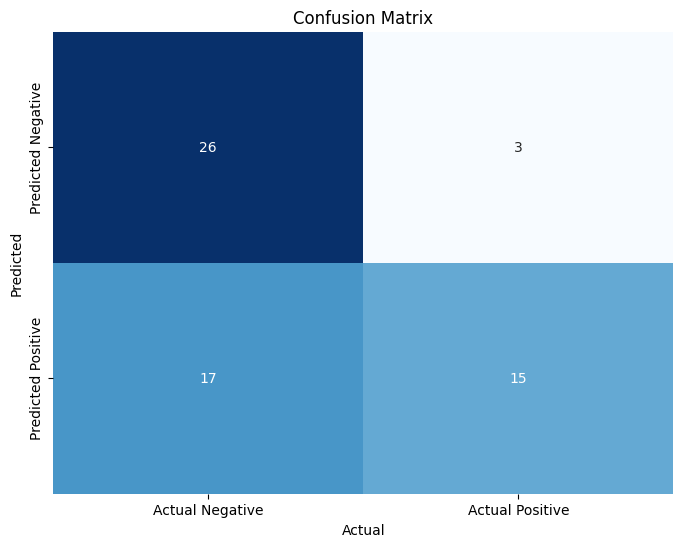

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72        29
           1       0.83      0.47      0.60        32

    accuracy                           0.67        61
   macro avg       0.72      0.68      0.66        61
weighted avg       0.72      0.67      0.66        61



In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Random Forest Classification

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix:


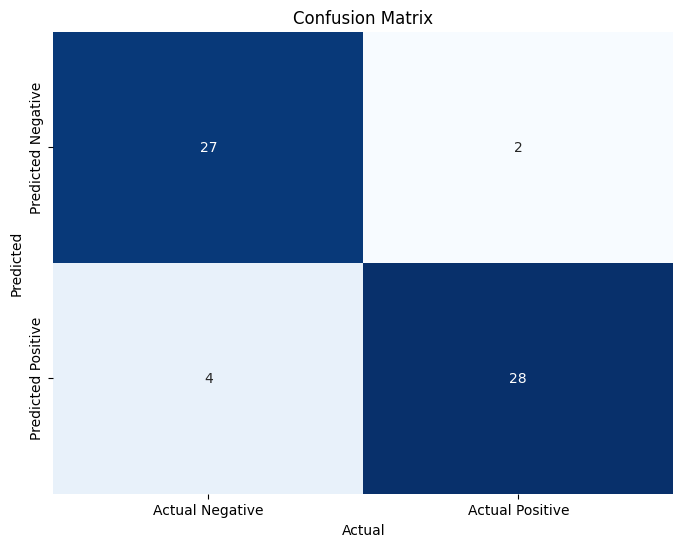

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Naive Bayes Classification

In [14]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)


Confusion Matrix:


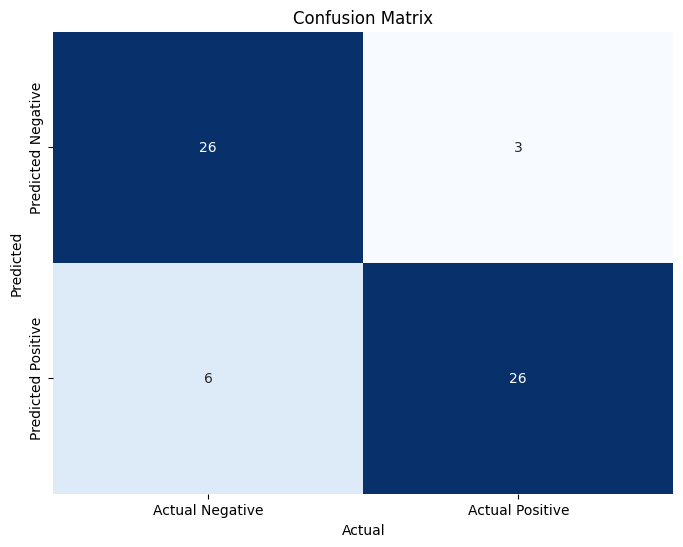

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix:


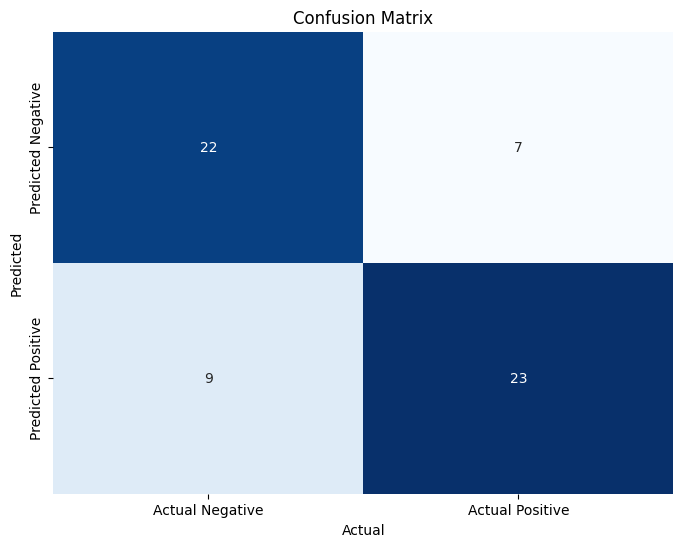

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Light GBM

In [18]:
import warnings

# Suppress LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [19]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = y_train)
params = {}

clf = lgb.train(params, d_train, 100)
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] Start training from score 0.442149
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

Confusion Matrix:


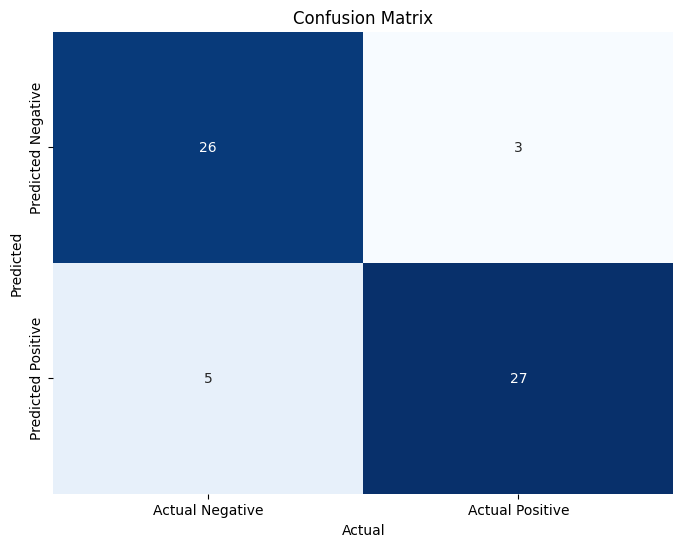

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# XGboost Classification

In [21]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

Confusion Matrix:


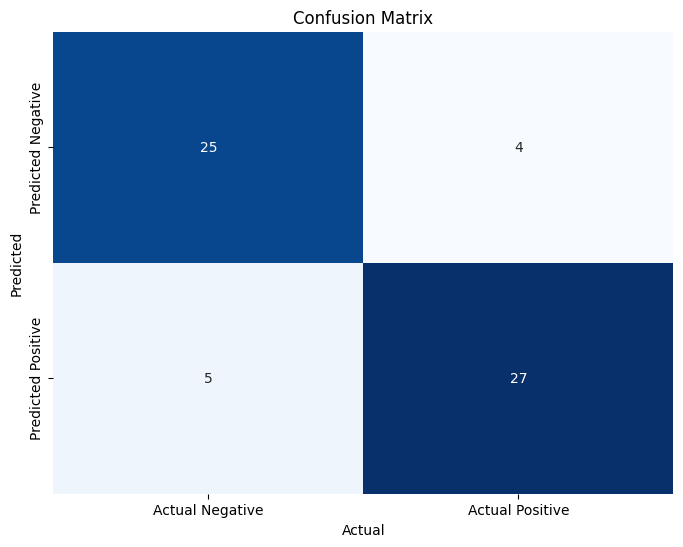

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Neural Network Classifier

In [23]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                      alpha=0.0001, batch_size='auto', learning_rate='constant', 
                      learning_rate_init=0.001, max_iter=200, shuffle=True, 
                      random_state=None, tol=0.0001, verbose=False, 
                      warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                      early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
                      beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, 
                      max_fun=15000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Confusion Matrix:


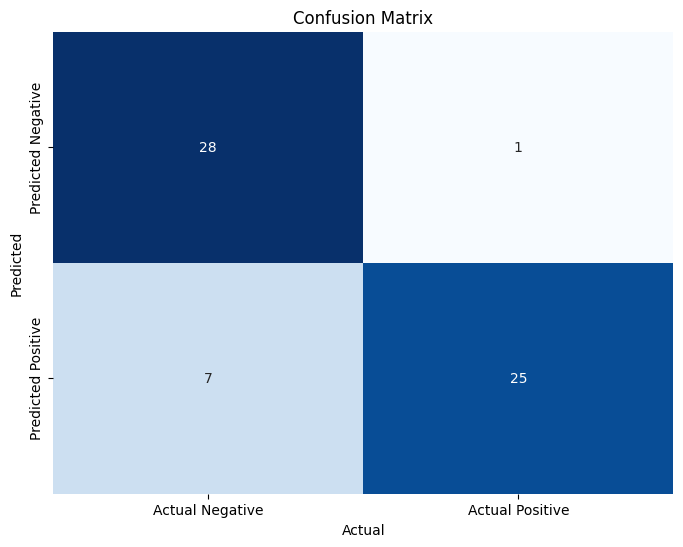

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        29
           1       0.96      0.78      0.86        32

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)